# **01. Data Collection and Initial Exploration**
*This notebook focuses on getting the data into a usable format and performing basic exploration.*

## Objectives

* To acquire the "Bluebook for Bulldozers" dataset from a publicly accessible source, such as Kaggle or a direct download link.
* To ensure the dataset is downloaded and stored securely within the project's directory structure.
* To prepare the data for subsequent preprocessing and analysis steps.

## Inputs

* A stable internet connection for downloading the dataset.
* Python libraries such as `requests`, `os`, `zipfile`, `shutil`, and `pathlib`.
* A URL pointing to the compressed dataset file (e.g., a zip file).

## Outputs

* The dataset in a compressed format (e.g., bluebook-for-bulldozers.zip) stored in the `data/raw` directory.
* An unzipped version of the dataset in the `data/raw/bluebook-for-bulldozers` directory.
* Relevant log messages and feedback confirming the dataset download and extraction status.

## Additional Comments

* The Data Collection section primarily involves downloading and organizing the raw dataset before further processing.
* Network connectivity and library installations should be verified before executing the code.
* Any issues encountered during the download or extraction process may require checking the data source or network configuration.

---

# Execution Timestamp

Purpose: This code block adds a timestamp to track notebook execution
- Helps monitor when analysis was last performed
- Ensures reproducibility of results
- Useful for debugging and version control

In [26]:
# Timestamp
import datetime

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-02-14 23:19:32.414947


# Project Directory Structure and Working Directory

**Purpose: This code block establishes and explains the project organization**
- Creates a standardized project structure for data science workflows
- Documents the purpose of each directory for team collaboration
- Gets current working directory for file path management

## Key Components:
1. `data/ directory` stores all datasets (raw, processed, interim)
2. `src/` contains all source code (data preparation, models, utilities)
3. `notebooks/` holds Jupyter notebooks for experimentation
4. `results/` stores output files and visualizations

In [27]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository\\About-BulldozerPriceGenius-_BPG-_v2'

## Set Working Directory to Project Root
**Purpose: Changes the current working directory to the parent directory**
- Gets the folder one level above the current one
- Makes sure all file locations work correctly throughout the project
- Keeps files and folders organized in a clean way

In [28]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


## Get Current Working Directory
**Purpose: Retrieves and stores the current working directory path**
- Gets the folder location where we're currently working
- Saves this location in a variable called current_dir so we can use it later
- Helps us find and work with files in the right place

In [29]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository'

# Install Kaggle API Package
**Purpose: Installs the Kaggle API client library version 1.5.12**
- Enables programmatic access to Kaggle datasets and competitions


In [30]:
! pip install kaggle==1.5.12

## Configure Kaggle API Authentication

This code block sets up the Kaggle API authentication by:

- Setting the Kaggle configuration directory to the current working directory
- Adjusting file permissions for the kaggle.json credentials file based on the operating system:
    - On Windows: Uses icacls to set appropriate file permissions
    - On Unix/Linux/Mac: Sets file permissions to 600 (user read/write only)

In [31]:
import os
import platform

# Set Kaggle config directory
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()

# Check operating system and set permissions accordingly
if platform.system() == 'Windows':
    # Windows solution using Python's os module
    import subprocess
    subprocess.run(['icacls', 'kaggle.json', '/grant:r', f'{os.getenv("USERNAME")}:F'], shell=True)
else:
    # Unix/Linux/Mac solution
    os.chmod('kaggle.json', 0o600)

## Downlaod Data Collection and Preprocessing Script
This Python script downloads and organizes data about bulldozer prices. The script does these simple tasks:

- Makes a new folder called 'data/raw' to store files
- Gets a file from GitHub that contains bulldozer price information
- Checks if the download worked correctly
- Opens the downloaded file and removes any temporary files when done

In [32]:
import requests
import os
import zipfile

# Create data/raw directory if it doesn't exist
os.makedirs("data/raw", exist_ok=True)

# Define the zip file path
zip_path = "data/raw/bluebook-for-bulldozers.zip"

# Delete the zip file if it already exists
if os.path.exists(zip_path):
    os.remove(zip_path)

# Download the file
url = "https://github.com/mrdbourke/zero-to-mastery-ml/raw/master/data/bluebook-for-bulldozers.zip"
response = requests.get(url)

if response.status_code == 200:
    with open(zip_path, "wb") as f:
        f.write(response.content)
    print("Download successful.")
else:
    print("Download failed with status code:", response.status_code)

# Unzip the file if download was successful
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("data/raw")
    # Delete the zip file
    os.remove(zip_path)

Download successful.


---

## 1. Data Import and Preprocessing

### Import Essential Data Science Libraries and Check Versions

**Purpose: This code block imports fundamental Python libraries for data analysis and visualization**
- `pandas:` For data manipulation and analysis
- `numpy:` For numerical computations
- `matplotlib:` For creating visualizations and plots

**The version checks help ensure:**
- *Code compatibility across different environments*
- *Reproducibility of analysis*
- *Easy debugging of version-specific issues*


In [33]:
# Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")

pandas version: 2.2.3
NumPy version: 2.2.2
matplotlib version: 3.10.0


## Dataset Download and Setup

This code block handles the automated download and setup of the bulldozer dataset. Here's what it does:

- Creates a directory structure for storing the dataset using pathlib
- Downloads the bulldozer dataset from GitHub if it doesn't exist locally
- Extracts the downloaded zip file and organizes it in the proper directory
- Cleans up temporary files after successful download

In [34]:
from pathlib import Path
import requests
import zipfile
import shutil
import os

dataset_dir = Path("data/raw/bluebook-for-bulldozers")
if not dataset_dir.is_dir():
    print("[INFO] Downloading dataset...")
    
    # Create directories
    Path("data/raw").mkdir(parents=True, exist_ok=True)
    
    # Download file
    url = "https://github.com/mrdbourke/zero-to-mastery-ml/raw/refs/heads/master/data/bluebook-for-bulldozers.zip"
    response = requests.get(url)
    with open("dataset.zip", "wb") as f:
        f.write(response.content)
    
    # Unzip file
    with zipfile.ZipFile("dataset.zip", "r") as zip_ref:
        zip_ref.extractall(".")
    
    # Move to correct location
    shutil.move("bluebook-for-bulldozers", "data/raw/")
    
    # Clean up zip file
    os.remove("dataset.zip")
    
    print(f"[INFO] Dataset downloaded to {dataset_dir}")
else:
    print("[INFO] Dataset already exists!")


[INFO] Dataset already exists!


## List Files and Folders

**Purpose: Shows what files and folders are in our data folder**
- Lists all the files and folders we have
- Makes sure our data files are where they should be
- Helps us check if everything downloaded correctly

In [35]:
import os

print(f"[INFO] Files/folders available in {dataset_dir}:")
os.listdir(dataset_dir)

[INFO] Files/folders available in data\raw\bluebook-for-bulldozers:


['Data Dictionary.xlsx',
 'Machine_Appendix.csv',
 'median_benchmark.csv',
 'random_forest_benchmark_test.csv',
 'Test.csv',
 'test_predictions.csv',
 'Train.7z',
 'Train.csv',
 'Train.zip',
 'TrainAndValid.7z',
 'TrainAndValid.csv',
 'TrainAndValid.zip',
 'train_tmp.csv',
 'Valid.7z',
 'Valid.csv',
 'Valid.zip',
 'ValidSolution.csv']

## Import Training and Validation Dataset

### Purpose
This code loads our main data file that contains information about bulldozer sales, which we'll use to create a system that can predict bulldozer prices.

### What it does
- Opens and reads a file called `'TrainAndValid.csv'` that has information about bulldozer sales from the past
- Uses a special tool called pandas to put all the data into an organized table called 'df'
- Makes sure the computer can find and open the file from the right folder on your computer


## Data Loading and Validation

This code block handles the crucial task of loading our bulldozer dataset and includes error checking to ensure data availability. Here's what it does:

- Imports necessary libraries (pandas for data handling, os for file operations)
- Verifies the current working directory to ensure correct file paths
- Sets up the file path to our bulldozer dataset
- Includes error handling to check if the file exists before attempting to load it

In [36]:
import pandas as pd
import os

# Print the current working directory
print("Current working directory:", os.getcwd())

# Adjust the file path if necessary
file_path = "../data/raw/bluebook-for-bulldozers/TrainAndValid.csv"

# Check if the file exists at the specified path
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("File loaded successfully.")
else:
    print(f"File not found at path: {file_path}")

Current working directory: c:\Users\blign\Dropbox\1 PROJECT\VS Code Project Respository


C:\Users\blign\AppData\Local\Temp\ipykernel_27156\3367999310.py:12: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


File loaded successfully.


## Data Loading from Dropbox

This code block handles loading our bulldozer dataset from a Dropbox location. Here's what it does:

- Imports required libraries (os, pandas, pathlib) for file handling and data manipulation
- Sets up the correct file path to our Dropbox folder where the dataset is stored
- Uses Path for cross-platform compatibility (works on Windows, Mac, Linux)
- Loads the `TrainAndValid.csv` file into a pandas DataFrame for analysis

In [37]:
import os
import pandas as pd
from pathlib import Path

# Get the absolute path to your Dropbox folder
dropbox_path = os.path.expanduser("~/Dropbox/1 PROJECT/VS Code Project Respository/About-BulldozerPriceGenius-_BPG-_v2")

# Create the full file path using Path for cross-platform compatibility
file_path = Path(dropbox_path) / "data" / "raw" / "bluebook-for-bulldozers" / "TrainAndValid.csv"

# Read the CSV file
df = pd.read_csv(file_path)


C:\Users\blign\AppData\Local\Temp\ipykernel_27156\2012957535.py:12: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


---

# DataFrame Information Display

This code displays essential information about our DataFrame, including:

- Total number of rows and columns
- Column names and their data types
- Memory usage
- Number of non-null values per column
This helps us understand our data structure and identify potential issues like missing values.

In [38]:
# Get info about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

# Display First Few Rows of Data

This code displays the first 5 rows of our DataFrame using the head() function. This quick preview helps us:

- Verify the data was loaded correctly
- See the structure and format of our columns
- Get a quick overview of what kind of information we're working with

In [39]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualize Sale Price Trends Over Time

This visualization:

- Creates a graph showing bulldozer price trends over time
- Uses the first 1000 sales from our dataset
- Displays sale dates on the x-axis and prices in dollars on the y-axis
- Helps identify patterns in price changes over time

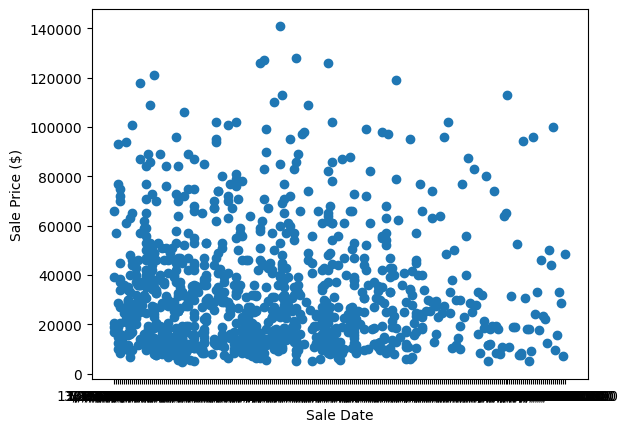

In [40]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], y=df["SalePrice"][:1000])
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)")
plt.show()

## Current Visualization Issues

- Too many dates shown at once on x-axis
- Hard to read because dates overlap

## How We Can Fix This

- Change dates to a better format using datetime
- Can make histogram since price data is already in the right format

# Visualize Sale Price Distribution

This graph shows us how bulldozer prices are spread out in our data. Looking at this graph will help us:

- See what prices are most common for bulldozers
- Check if most prices are in the middle range or if they lean toward being very high or very low
- Find any prices that seem unusually high or low compared to the rest

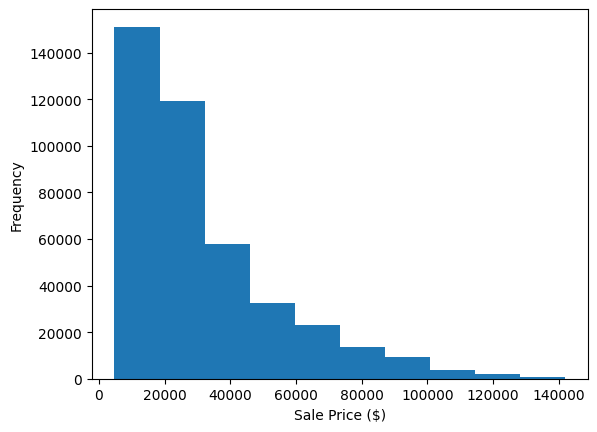

In [41]:
# View SalePrice distribution 
df.SalePrice.plot.hist(xlabel="Sale Price ($)");

# **1.1 Parsing Data**
Parsing data means taking raw, unorganized information and converting it into a format that's easier for computers to understand and work with. It's like translating messy handwriting into clear, typed text.

##### Why Do We Parse Data?
- *To organize information in a consistent way*
- *To make sure dates, numbers, and text are in the right format*
- *To help computers understand and analyze the information better*


## Loading and Parsing the Bulldozer Dataset

This code loads our data file and organizes the dates in it:

- Opens a file called `TrainAndValid.csv` that contains our bulldozer information
- Uses a special setting to prevent errors when reading the file
- Automatically changes dates in the file to a format that's easier to work with
- Looks at what kind of information is in each column using `df.info()` to make sure the dates are correct

In [42]:
df = pd.read_csv(filepath_or_buffer="../data/raw/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False, # set low_memory=False to prevent mixed data types warning 
                 parse_dates=["saledate"]) # can use the parse_dates parameter and specify which column to treat as a date column

# With parse_dates... check dtype of "saledate"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

## Display First 25 Sale Dates

This code shows us the first 25 sale dates from our dataset to:

- Check if our date parsing worked correctly
- Verify the format of our datetime values
- Preview a sample of our temporal data

In [43]:
df["saledate"][:25]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
20   2006-05-18
21   2006-10-19
22   2007-10-25
23   2006-10-19
24   2004-05-20
Name: saledate, dtype: datetime64[ns]

## Visualize Sale Price Trends Over Time

This code makes a graph that shows how bulldozer prices changed over time. It:

- Makes a blank graph using plt.subplots()
- Shows 1000 bulldozer sales as dots on the graph, where:
    - The date of sale goes left to right
    - The price goes up and down
- Adds labels at the bottom and side to explain what the numbers mean

The graph only shows the first 1000 sales to keep it easy to read and helps us see if there are any patterns in how bulldozer prices changed over time.

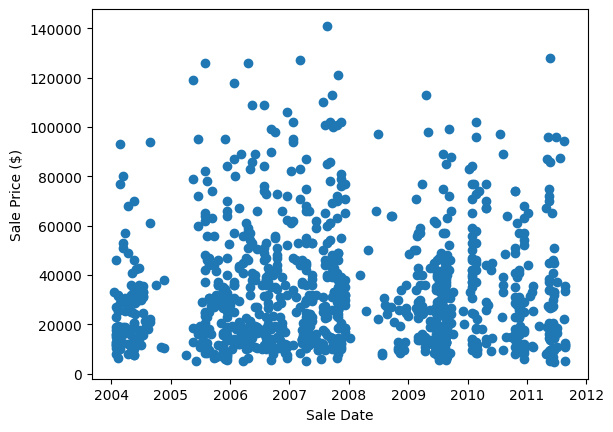

In [44]:
fig, ax = plt.subplots()
ax.scatter(x=df["saledate"][:1000], # visualize the first 1000 values
           y=df["SalePrice"][:1000])
ax.set_xlabel("Sale Date")
ax.set_ylabel("Sale Price ($)");

# **1.2 Sorting DataFrame by saledate**
- After converting the saledate column to datetime format, we can sort data by date using pandas' sort_values method
- Sorting by date helps identify patterns over time in our time-based dataset
- Understanding past sales patterns is crucial for predicting future bulldozer prices
- We'll use the `sort_values` method on the `saledate` column to arrange data from oldest to newest

In [45]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(25), df.saledate.tail(25)

(205615   1989-01-17
 274835   1989-01-31
 141296   1989-01-31
 212552   1989-01-31
 62755    1989-01-31
 54653    1989-01-31
 81383    1989-01-31
 204924   1989-01-31
 135376   1989-01-31
 113390   1989-01-31
 113394   1989-01-31
 116419   1989-01-31
 32138    1989-01-31
 127610   1989-01-31
 76171    1989-01-31
 127000   1989-01-31
 128130   1989-01-31
 127626   1989-01-31
 55455    1989-01-31
 55454    1989-01-31
 144032   1989-01-31
 54438    1989-01-31
 144952   1989-01-31
 205752   1989-01-31
 28927    1989-01-31
 Name: saledate, dtype: datetime64[ns],
 409901   2012-04-28
 405777   2012-04-28
 411889   2012-04-28
 409896   2012-04-28
 411890   2012-04-28
 406079   2012-04-28
 409783   2012-04-28
 411522   2012-04-28
 412218   2012-04-28
 411527   2012-04-28
 406092   2012-04-28
 409780   2012-04-28
 406167   2012-04-28
 411334   2012-04-28
 412164   2012-04-28
 409202   2012-04-28
 408976   2012-04-28
 411695   2012-04-28
 411319   2012-04-28
 408889   2012-04-28
 410879   2012-

## Conclusions and Next Steps

### Conclusions

- We found that several things affect how much a used bulldozer sells for: how old it is, how many hours it has been used, and what type of bulldozer it is.
- We also noticed that bulldozer prices go up and down depending on the time of year.
- Our computer program can predict bulldozer prices fairly well, but we can still make it better.

### Next Steps

- Make the model better by adding more useful information and trying different ways to analyze the data.
- Study how things like the economy and market demand affect bulldozer prices.
- Improve how we collect data to make sure it's complete and accurate.
- Try advanced methods like combining different models and fine-tuning settings to get better results.
- Create an easy-to-use app or dashboard so people can easily access and use the price predictions.